# Hybrid Switching
***
The Hybrid Switching solver is designed to allow a model's species to be represented dynamically as either continuous or stochastic throughout the simulation.  This solver will represent a reaction channel deterministically at high populations in order to favor performance, and will automatically switch to a stochastic representation at lower populations.  This allows for substantial run-time improvements over the SSA, minimizing the loss of stochastic accuracy.  
  
There is no special setup for the standard case of using this switching mechanism, however for cases where a particular species should always be represented as 'stochastic' or always represented as 'continuous,' the GillesPy2.species can be constructed with kwarg 'mode' locking that into place.  

**mode='dynamic'(default) - allows for hybrid switching  
mode='continuous' - forces a species to be modeled continuously/deterministically  
mode='discrete' - forces a species to be modeled discretely/stochastically**  

Ex:  
A = GillesPy2.Species(name='A', initial_value=400, mode='continuous')
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

MatPlotLib is used for creating custom visualizations

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gillespy2

***
## Create the Automatic Switching Model
***

In [4]:
def create_automatic_switch_example(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Automatic Switch Example")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='A', initial_value=400)
    B = gillespy2.Species(name='B', initial_value=10000)
    C = gillespy2.Species(name='C', initial_value=10000)
    
    # Add Variables to Model
    model.add_species([A, B, C])

    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression= 3e-4)
    k2 = gillespy2.Parameter(name='k2', expression= 0.5e-2)
    k3 = gillespy2.Parameter(name='k3', expression = 2e-1)
    
    # Add Parameters to Model
    model.add_parameter([k1, k2, k3])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1",reactants={'A': 1, 'B': 1}, products={'B': 1, 'C': 1}, rate='k1')
    r2 = gillespy2.Reaction(name="r2",reactants={'B': 1}, products={}, rate='k2')
    r3 = gillespy2.Reaction(name="r3",reactants={'C': 1}, products={'A': 1}, rate='k3')

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=600, num_points=601)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [5]:
model = create_automatic_switch_example()

***
## Run the Simulations
***
The hybrid switching condition is based on a coefficient of variance for each species.  The error threshold for this condition can be user modified by instantiating the solver, and calling the run function from it, rather than the solver.  
  
The default value is `0.03` and is a threshold to the coefficient of variance for each species at the selected forward step (t + tau).

In [6]:
%time tau_hybrid_results = model.run(algorithm="Tau-Hybrid")

CPU times: user 13.7 ms, sys: 11.6 ms, total: 25.3 ms
Wall time: 6.04 s


Additionally, the `tau_tol` can be modified to result in extremely fast simulations.

In [7]:
%time results2 = model.run(algorithm="Tau-Hybrid", tau_tol=0.04)

CPU times: user 4.61 ms, sys: 10.2 ms, total: 14.8 ms
Wall time: 5.86 s


In [8]:
%time results3 = model.run()

CPU times: user 3.13 ms, sys: 8.29 ms, total: 11.4 ms
Wall time: 1.69 s


***
## Visualizations
***

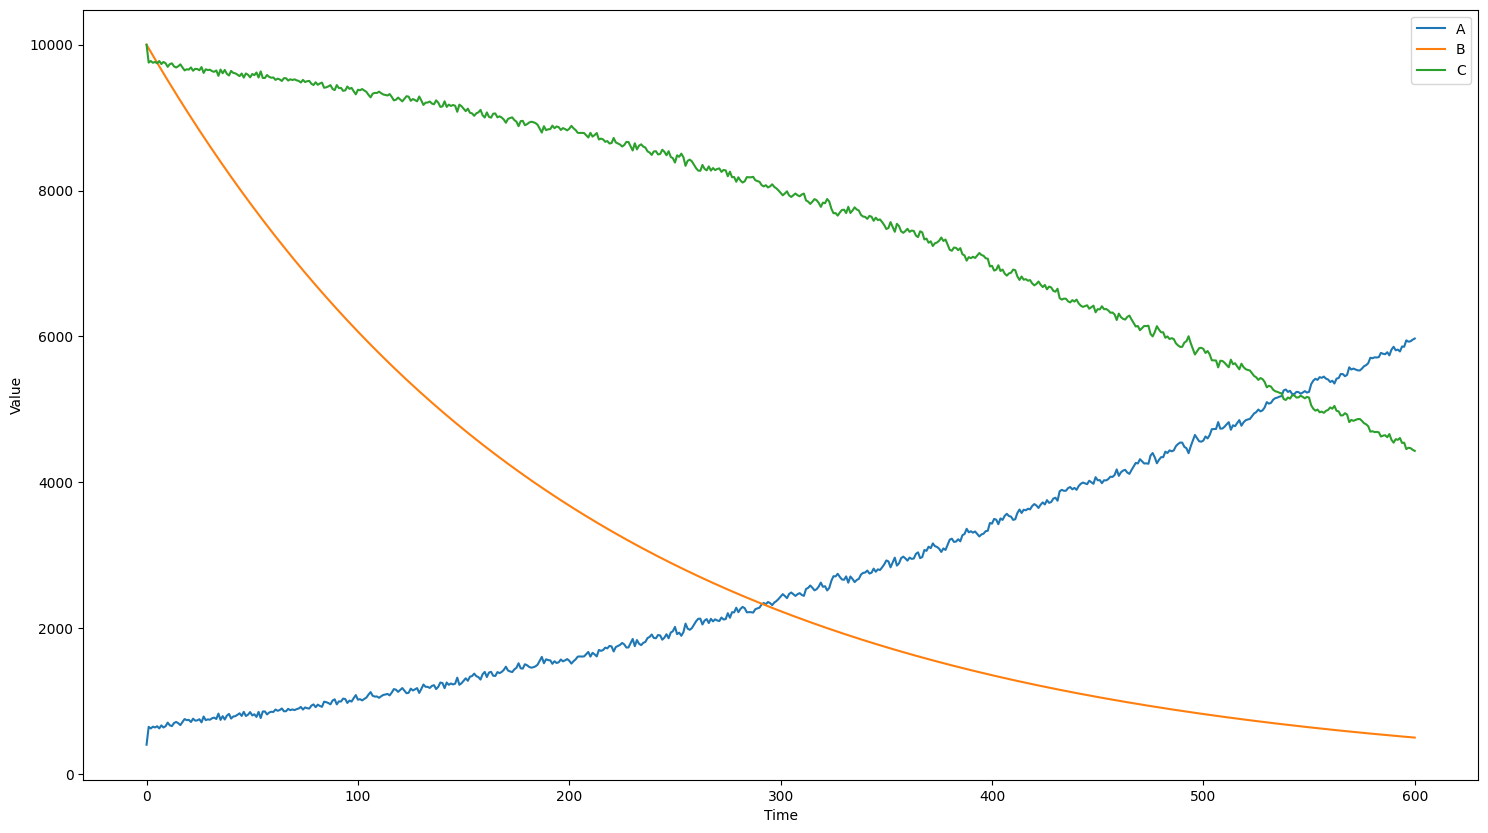

In [9]:
tau_hybrid_results.plot()

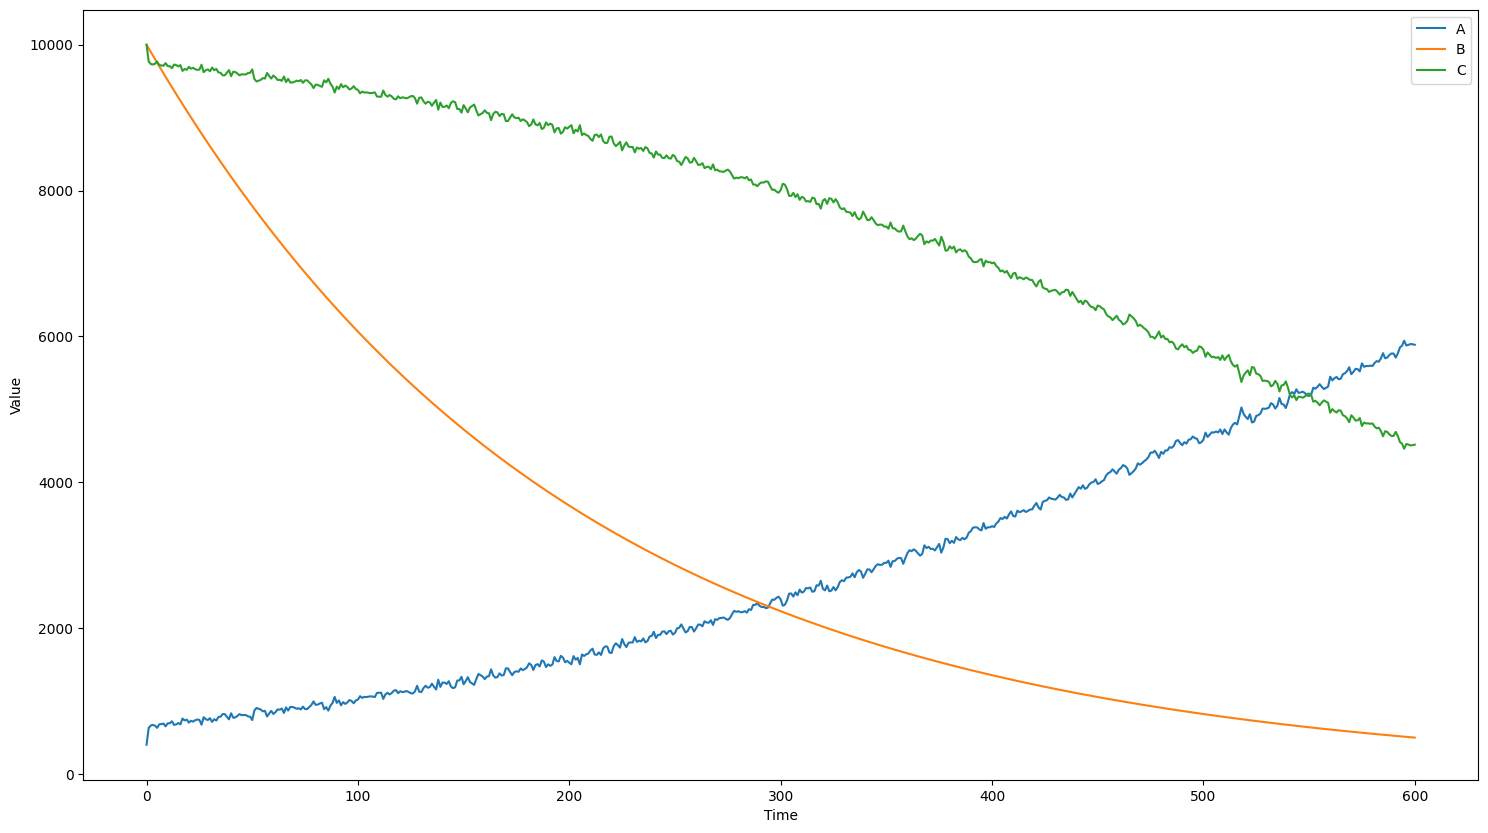

In [10]:
results2.plot()

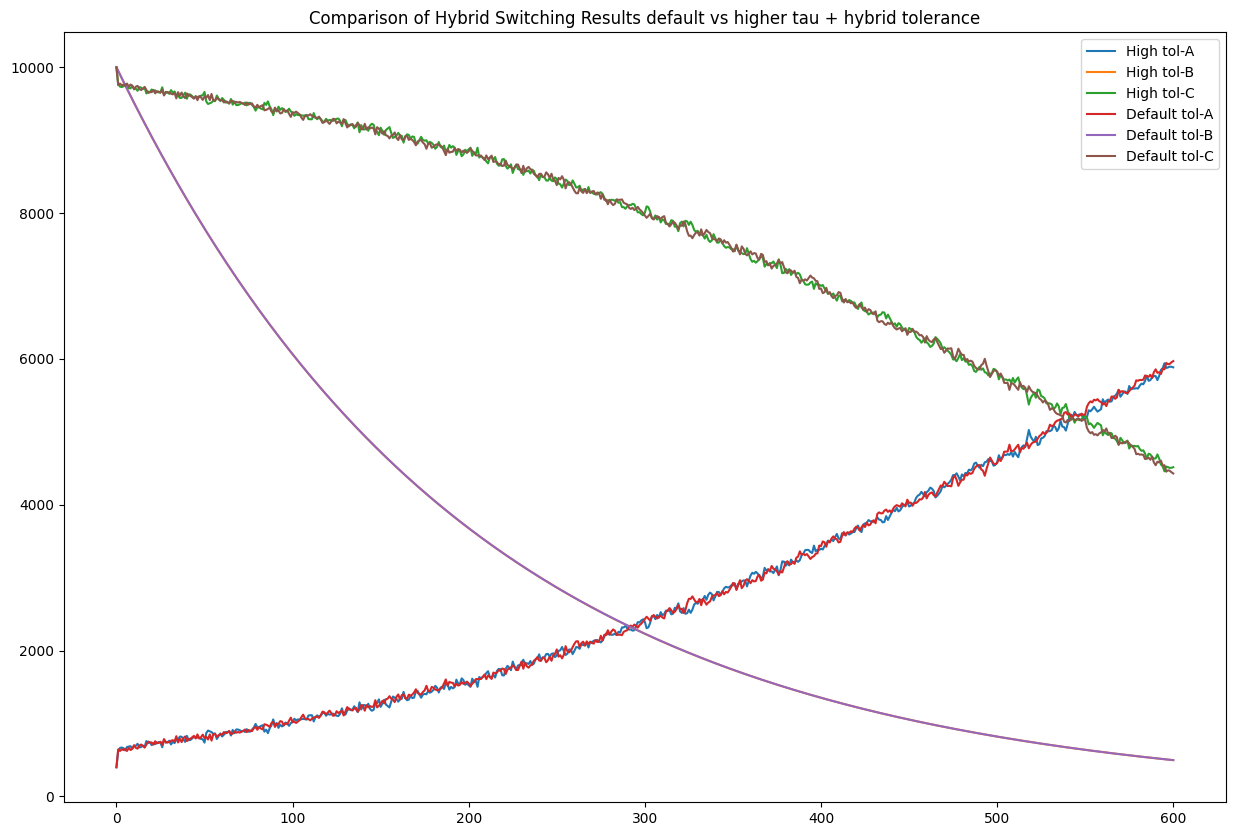

In [11]:
plt.figure(figsize=(15, 10))
plt.title('Comparison of Hybrid Switching Results default vs higher tau + hybrid tolerance')
for species in results2[0]:
    if species == 'time': continue
    plt.plot(results2[0]['time'], results2[0][species], label='High tol-{0}'.format(species))
for species in tau_hybrid_results[0]:
    if species == 'time': continue
    plt.plot(tau_hybrid_results[0]['time'], tau_hybrid_results[0][species], label='Default tol-{0}'.format(species))
    plt.legend(loc='best')

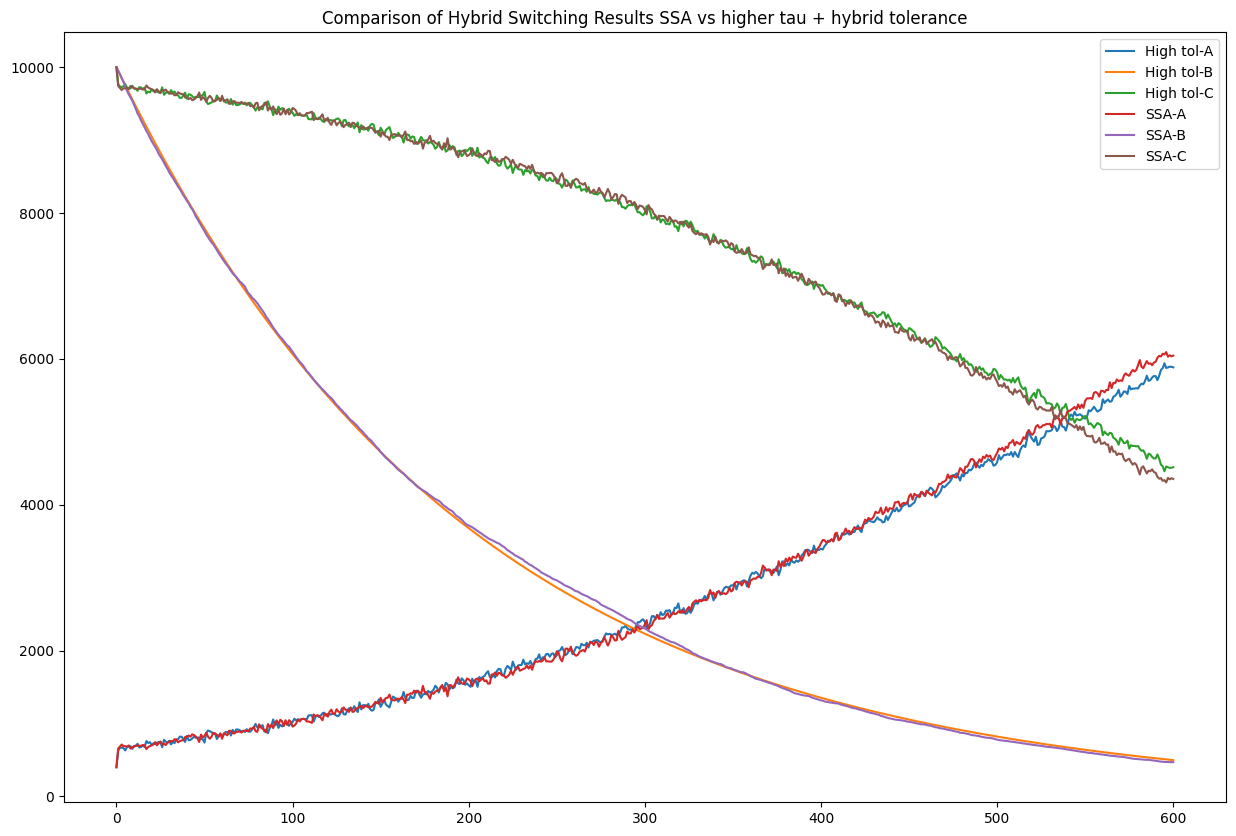

In [12]:
plt.figure(figsize=(15, 10))
plt.title('Comparison of Hybrid Switching Results SSA vs higher tau + hybrid tolerance')
for species in results2[0]:
    if species == 'time': continue
    plt.plot(results2[0]['time'], results2[0][species], label='High tol-{0}'.format(species))
for species in results3[0]:
    if species == 'time': continue
    plt.plot(results3[0]['time'], results3[0][species], label='SSA-{0}'.format(species))
    plt.legend(loc='best')